In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [2]:
# Use data from Lending Club

y2015 = pd.read_csv('LoanStats3d.csv', skipinitialspace=True, header=1)

# Note the warning about dtypes


/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0,19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
y2015.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,20000.0,20000.0,20000.0,36 months,6.49%,612.89,A,A2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,10000.0,10000.0,10000.0,36 months,12.88%,336.37,C,C2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,18000.0,18000.0,18000.0,36 months,7.49%,559.83,A,A4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,20000.0,20000.0,20000.0,36 months,5.32%,602.30,A,A1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,16000.0,16000.0,16000.0,60 months,12.88%,363.07,C,C2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


from sklearn import ensemble
from sklearn.model_selection import cross_val_score
rfc = ensemble.RandomForestClassifier()
X = y2015.drop('loan_status', 1)
Y = y2015['loan_status']
#X = pd.get_dummies(X)

#cross_val_score(rfc, X, Y, cv=5)

In [4]:
#categorical = y2015.select_dtypes(include=['object'])
#for i in categorical:
#    column = categorical[i]
#    print(i)
#    print(column.nunique())

In [5]:
# Convert ID and Interest Rate to numeric
y2015['id'] = pd.to_numeric(y2015['id'], errors='coerce')
y2015['int_rate'] = pd.to_numeric(y2015['int_rate'].str.strip('%'), errors='coerce')

# Drop other columns with many unique variables
y2015.drop(['url', 'emp_title', 'zip_code', 'earliest_cr_line', 'revol_util',
            'sub_grade', 'addr_state', 'desc'], 1, inplace=True)

In [6]:
y2015.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
421092,NaN,NaN,13000.0,13000.0,13000.0,60 months,15.99,316.07,D,5 years,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
421093,NaN,NaN,12000.0,12000.0,12000.0,60 months,19.99,317.86,E,1 year,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
421094,NaN,NaN,20000.0,20000.0,20000.0,36 months,11.99,664.20,B,10+ years,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
421095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
421096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Remove the two summary rows at the end that don't contain data

y2015 = y2015[:-2]

In [8]:
pd.get_dummies(y2015).head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,settlement_date_Nov-2016,settlement_date_Nov-2017,settlement_date_Oct-2015,settlement_date_Oct-2016,settlement_date_Oct-2017,settlement_date_Oct-2018,settlement_date_Sep-2015,settlement_date_Sep-2016,settlement_date_Sep-2017,settlement_date_Sep-2018
0,NaN,NaN,20000.0,20000.0,20000.0,6.49,612.89,55000.0,29.15,0.0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,NaN,10000.0,10000.0,10000.0,12.88,336.37,91392.0,9.44,0.0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,NaN,18000.0,18000.0,18000.0,7.49,559.83,75000.0,25.65,0.0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,NaN,20000.0,20000.0,20000.0,5.32,602.30,65000.0,18.83,0.0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,NaN,16000.0,16000.0,16000.0,12.88,363.07,90000.0,6.39,0.0,...,0,0,0,0,0,0,0,0,0,0


## Start of model

In [9]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

rfc = ensemble.RandomForestClassifier()
X = y2015.drop('loan_status', 1)
Y = y2015['loan_status']
X = pd.get_dummies(X)
X = X.dropna(axis=1)

cross_val_score(rfc, X, Y, cv=10)

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The de

array([0.98907701, 0.98857808, 0.98755699, 0.98786512, 0.98812605,
       0.98743736, 0.98805481, 0.98943194, 0.987983  , 0.98945518])

In [10]:
corr = y2015.corr()

In [11]:
print(corr)

                                            id  member_id  loan_amnt  \
id                                         NaN        NaN        NaN   
member_id                                  NaN        NaN        NaN   
loan_amnt                                  NaN        NaN   1.000000   
funded_amnt                                NaN        NaN   1.000000   
funded_amnt_inv                            NaN        NaN   0.999994   
int_rate                                   NaN        NaN   0.140468   
installment                                NaN        NaN   0.941170   
annual_inc                                 NaN        NaN   0.305734   
dti                                        NaN        NaN   0.018281   
delinq_2yrs                                NaN        NaN  -0.010424   
inq_last_6mths                             NaN        NaN  -0.039040   
mths_since_last_delinq                     NaN        NaN  -0.034863   
mths_since_last_record                     NaN        NaN  -0.01

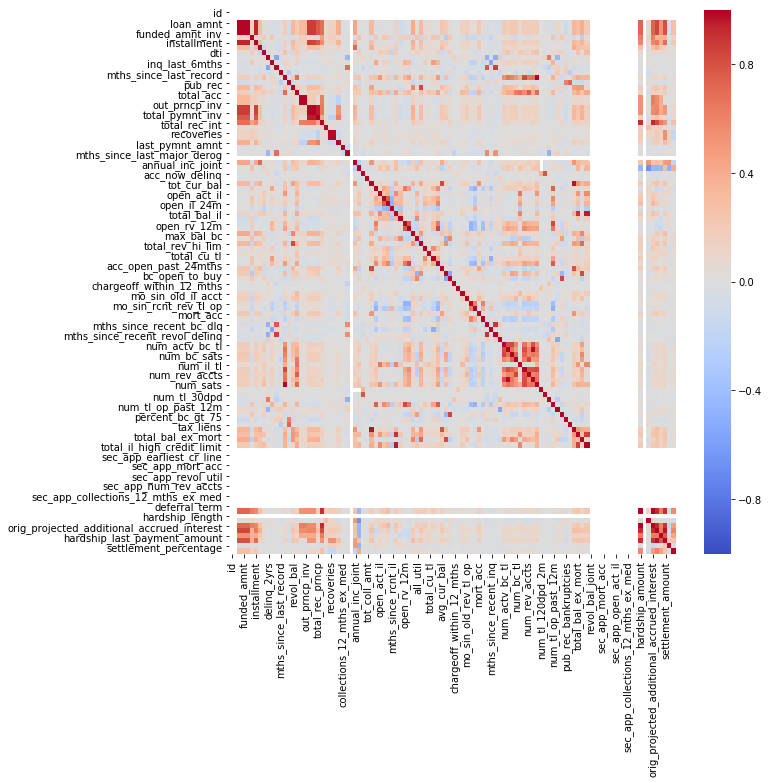

In [12]:
fig, ax = plt.subplots(figsize=(10,10))  

sns.heatmap(corr, vmin=-1, vmax=1, cmap='coolwarm')

In [13]:
select_best = SelectKBest(f_classif, k=10)

In [14]:
X_new = select_best.fit_transform(X, Y)

/usr/local/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 23 324] are constant.
  UserWarning)
/usr/local/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [15]:
columns = X.columns.values
print(columns[26])
print(columns[97])

X.drop(columns=['policy_code', 'pymnt_plan_n'], inplace=True);


tot_cur_bal
purpose_credit_card


In [38]:
X_new = select_best.fit_transform(X, Y)
features_list = []

features = select_best.get_support()
for x in range(len(features)):
    if features[x] == 1:
        print(columns[x])
        features_list.append(columns[x])


/usr/local/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [322] are constant.
  UserWarning)
/usr/local/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


out_prncp
out_prncp_inv
recoveries
collection_recovery_fee
last_pymnt_amnt
last_pymnt_d_Oct-2016
last_pymnt_d_Sep-2016
next_pymnt_d_Aug-2018
next_pymnt_d_Feb-2018
last_credit_pull_d_Oct-2016


In [17]:
y2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421095 entries, 0 to 421094
Columns: 137 entries, id to settlement_term
dtypes: float64(108), object(29)
memory usage: 440.1+ MB


In [18]:
y2015.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,0.0,421095.000000,421095.000000,421095.000000,421095.000000,421095.000000,4.210950e+05,421093.000000,421095.000000,...,2422.0,2422.000000,2422.0,2422.000000,1978.000000,2422.000000,2422.000000,10248.000000,10248.000000,10248.000000
mean,NaN,NaN,15240.285862,15240.285862,15234.156426,12.599411,441.845030,7.696561e+04,19.148367,0.347397,...,3.0,117.880339,3.0,14.066474,349.697836,9271.744269,182.696193,4937.287842,47.330416,12.516686
std,NaN,NaN,8571.325901,8571.325901,8567.935757,4.318727,244.846963,7.394996e+04,8.885104,0.927695,...,0.0,98.706525,0.0,9.798134,291.043027,6241.770829,184.051865,3583.677970,6.303308,7.783691
min,NaN,NaN,1000.000000,1000.000000,900.000000,5.320000,14.010000,0.000000e+00,0.000000,0.000000,...,3.0,0.640000,3.0,0.000000,1.920000,55.730000,0.020000,133.000000,20.000000,0.000000
25%,NaN,NaN,8500.000000,8500.000000,8500.000000,9.170000,263.930000,4.600000e+04,12.590000,0.000000,...,3.0,39.802500,3.0,6.000000,119.032500,4014.720000,39.782500,2107.532500,45.000000,6.000000
50%,NaN,NaN,14000.000000,14000.000000,14000.000000,12.290000,385.410000,6.500000e+04,18.600000,0.000000,...,3.0,90.435000,3.0,15.000000,268.665000,8158.580000,124.535000,4205.200000,45.000000,12.000000
75%,NaN,NaN,20000.000000,20000.000000,20000.000000,15.590000,578.790000,9.169050e+04,25.340000,0.000000,...,3.0,167.675000,3.0,23.000000,501.772500,13363.030000,274.602500,6857.000000,50.000000,18.000000
max,NaN,NaN,35000.000000,35000.000000,35000.000000,28.990000,1445.460000,9.500000e+06,999.000000,39.000000,...,3.0,638.130000,3.0,30.000000,1914.390000,29401.040000,1247.480000,30000.000000,166.670000,112.000000


In [19]:
rfc = ensemble.RandomForestClassifier(n_estimators=100)

cross_val_score(rfc, X_new, Y, cv=10)

array([0.94600242, 0.95265008, 0.95597454, 0.95122299, 0.94765965,
       0.94808711, 0.94830084, 0.94734967, 0.94421355, 0.92469007])

In [20]:
s = corr.abs().unstack()
so = s.sort_values(kind="quicksort", ascending=False).drop_duplicates()

In [21]:
print(so[1:20])

settlement_term                             settlement_term                               1.000000
out_prncp_inv                               out_prncp                                     0.999998
total_pymnt                                 total_pymnt_inv                               0.999996
funded_amnt_inv                             funded_amnt                                   0.999994
num_sats                                    open_acc                                      0.998602
collection_recovery_fee                     recoveries                                    0.991953
num_rev_tl_bal_gt_0                         num_actv_rev_tl                               0.980849
tot_cur_bal                                 tot_hi_cred_lim                               0.974943
settlement_amount                           hardship_payoff_balance_amount                0.971167
total_il_high_credit_limit                  total_bal_il                                  0.958632
total_pymn

In [28]:
rfc_10 = ensemble.RandomForestClassifier(n_estimators=100).fit(X_new, Y)
feature_importance = rfc_10.feature_importances_ 

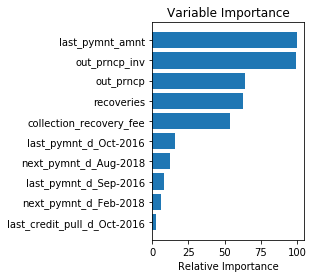

In [39]:
X_new2 = pd.DataFrame(X_new, columns=features_list)
# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_new2.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

The model won't work without payment amount or outstanding principle.  Those two are the most important features in the model.  

In [47]:
X2 = y2015[['last_pymnt_amnt', 'out_prncp_inv', 'out_prncp', 'recoveries', 'collection_recovery_fee']]

In [48]:
# See if cross validation score will stay above .90 with just the five most important features
# Two and 3 fell just below threshold
rfc = ensemble.RandomForestClassifier(n_estimators=100)

cross_val_score(rfc, X2, Y, cv=10)

array([0.93422459, 0.94797207, 0.95070289, 0.9484683 , 0.94768339,
       0.94839583, 0.94388373, 0.94452361, 0.94207614, 0.92516506])